In [1]:
!pip install astroquery

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 3.5 MB/s eta 0:00:04
    --------------------------------------- 0.2/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/11.1 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.1 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.1 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.1 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.1 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.1 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/11.1 MB 2.9 MB/s eta 0:00:04
   ---

In [ ]:
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView

In [41]:
#Hdu contain both header and the data file
hdu=SkyView.get_images('M31','SDSSg')[0][0]

In [7]:
hdu.header

SIMPLE  =                    T / Written by SkyView Tue Mar 04 01:08:27 EST 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [42]:
#Gives pixel info about the image 
M31_pixels=hdu.data
M31_pixels

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [10]:
type(M31_pixels)


numpy.ndarray

In [11]:
M31_pixels.shape

(300, 300)

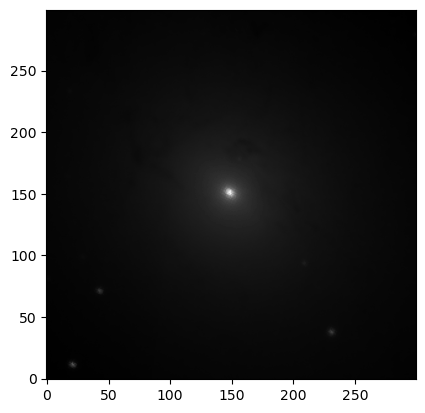

In [ ]:
#origin helps in correcting the origin value in asc order 
plt.imshow(M31_pixels,cmap='gray',origin='lower')

In [16]:
import astropy.units as u

In [17]:
hdu=SkyView.get_images('M31','DSS2 Blue',pixels=600,radius=150*u.arcmin)[0][0]

In [18]:
M31_DSS2_Blue_Pixels=hdu.data

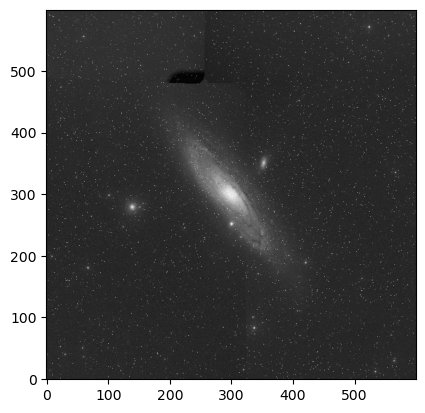

In [19]:
plt.imshow(M31_DSS2_Blue_Pixels,cmap='gray',origin='lower')

Creating a dummy FITS file

In [38]:
M31_header=hdu.header
M31_pixels2=hdu.data

In [21]:
from astropy.io import fits

In [22]:
# Steps to prepare data for FITS file

# 1) Create HDUList() to store different HDUs
hdulist=fits.HDUList()

# 2) Create primaryHDU()
hdu1=fits.PrimaryHDU()

# 3) Add Pixels data
hdu1.data=M31_pixels

# 4) Add meta data

hdu1.header=M31_header

# 5) Append this primary HDU to the HDU List 
hdulist.append(hdu1)

# 6) Generate the FITS data

hdulist.writeto('Dummy_FITS_file.fits')

In [24]:
# open the FITS data

My_fits=fits.open('Dummy_FITS_file.fits')



In [26]:
My_fits[0].header

SIMPLE  =                    T / Written by SkyView Tue Mar 04 01:25:02 EST 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [29]:
fits_data=My_fits[0].data
fits_data

array([[ 9129.,  9654.,  8932., ...,  8553., 10282.,  9129.],
       [ 9348.,  9511.,  8694., ...,  8862.,  8557.,  9007.],
       [ 8647., 13497.,  8787., ...,  8717.,  8862.,  9171.],
       ...,
       [10021.,  9664.,  9675., ...,  9435., 11916.,  9494.],
       [ 9820.,  9779.,  9783., ...,  9600.,  9659.,  9637.],
       [ 9740.,  9658.,  9448., ...,  9312.,  9612.,  9649.]], dtype='>f4')

In [30]:
fits_data.shape

(600, 600)

In [31]:
type(fits_data)

numpy.ndarray

Pixel Scaling for M31 Data

In [32]:
import numpy as np

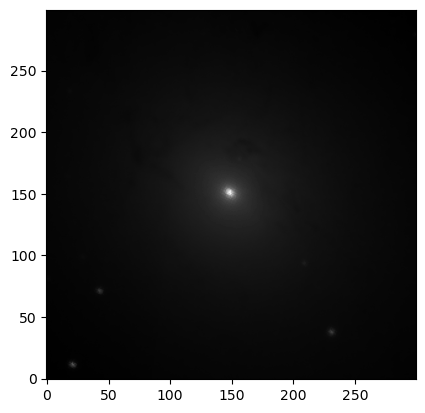

In [43]:
plt.imshow(M31_pixels, cmap='gray', origin='lower')

In [44]:
# Checking for some stastical data using numpy
print('Sumarray Statistics of M31 Pixels:-')
print(f'Minimum:-{np.min(M31_pixels)}')
print(f'Maximum:-{np.max(M31_pixels)}')
print(f'Average:-{np.mean(M31_pixels)}')
print(f'Std:-{np.std(M31_pixels)}')

Sumarray Statistics of M31 Pixels:-
Minimum:-5.359375
Maximum:-178.0
Average:-13.329444885253906
Std:-6.3922271728515625


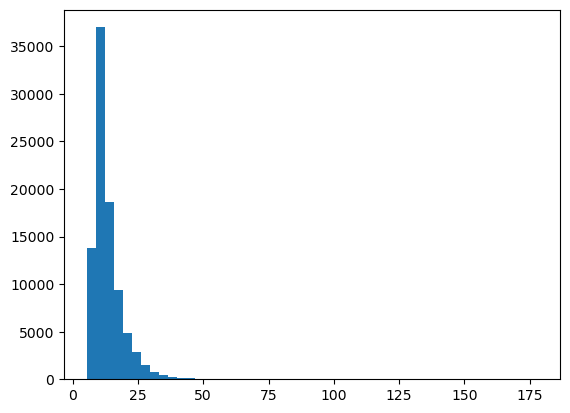

In [45]:
plt.hist(M31_pixels.flat,bins=50)
plt.show()

Intensity Normalization or Linear Scaling or Min Max Scaling


x(scaled)=x-x(min)/x(max)-x(min)

In [48]:
#function to plot the scaled pixel arrays
def plot_pixels(pixel_array,title,color):
    plt.imshow(pixel_array,cmap='gray',origin='lower')
    plt.title(title,color=color,weight='bold')
    plt.axis('off')
    plt.show()

In [58]:
def compare_pixels(scaled_array,title):
    plt.subplot(1,2,1)
    plot_pixels(M31_pixels,title='Original Image',color='black')
    plt.subplot(1,2,2)
    plot_pixels(scaled_array,title=title,color='royalBlue')
    plt.tight_layout()
    plt.show()

In [47]:
def minmax_scaling(pixel_array):
    num=pixel_array-np.min(pixel_array)
    den=np.max(pixel_array)-np.min(pixel_array)
    return num/den

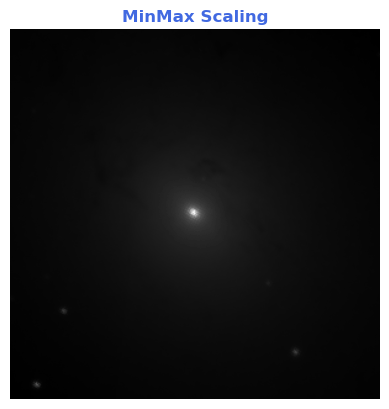

In [ ]:
minmax_array=minmax_scaling(M31_pixels)
plot_pixels(minmax_array,title='MinMax Scaling')

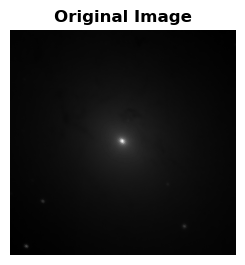

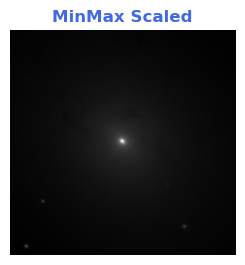

<Figure size 640x480 with 0 Axes>

In [ ]:
compare_pixels(minmax_array,title='MinMax Scaled')

2) Standardization or Z scaling

z=x-mean/sd

In [56]:
def zscale(pixel_array):
    num=pixel_array-np.mean(pixel_array)
    den=np.std(pixel_array)
    return num/den

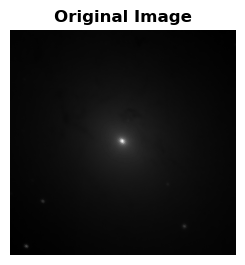

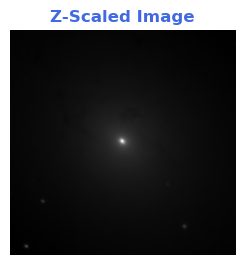

<Figure size 640x480 with 0 Axes>

In [ ]:
zscaled_array=zscale(M31_pixels)
compare_pixels(zscaled_array,title='Z-Scaled Image')

3) Log Normalization


In [ ]:
# Function for log distribution
def log_normalization(pixel_array):
    return np.log(pixel_array)

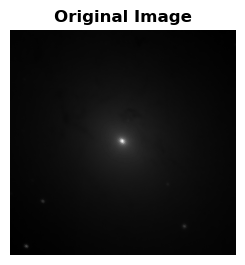

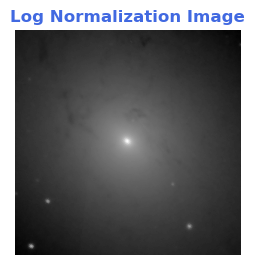

<Figure size 640x480 with 0 Axes>

In [62]:
log_norm_array=log_normalization(M31_pixels)
compare_pixels(log_norm_array,title='Log Normalization Image')

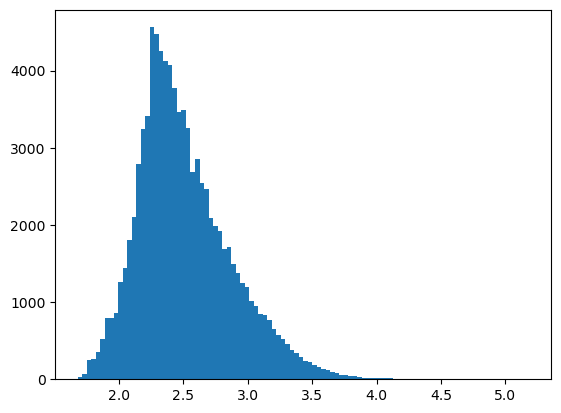

In [63]:
# Creating histrogram of pixels for log distribution

plt.hist(log_norm_array.flat,bins=100)
plt.show()

4) Square Root

In [64]:
def sqrt_scaling(pixel_array):
    return np.sqrt(pixel_array)

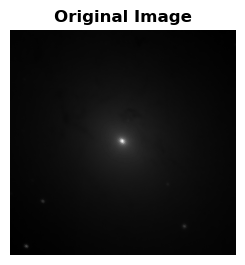

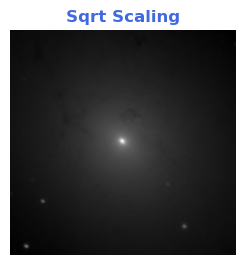

<Figure size 640x480 with 0 Axes>

In [ ]:
sqrt_scaled_array=sqrt_scaling(M31_pixels)
compare_pixels(sqrt_scaled_array,'Square Root Scaling')

Z scale interval

In [66]:
# get the zScaleInterval for visualization module of astropy

from astropy.visualization import ZScaleInterval

In [67]:
# create the object for ZScaleinterval
z=ZScaleInterval()

In [68]:
z1,z2=z.get_limits(log_norm_array)

In [70]:
print(np.min(log_norm_array))
print(np.max(log_norm_array))

1.6788473
5.1817837


In [ ]:
#Plot the M31 data using this interval
print(f'Minimum={z1}')
print(f'Maximum={z2}')

Minimum=1.6889997720718384
Maximum=4.4479101990272145


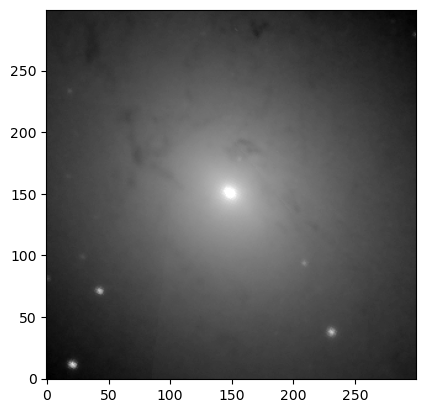

In [73]:
# generates a more highlighted image
img=plt.imshow(log_norm_array,vmin=z1,vmax=z2,cmap='gray',origin='lower')
plt.show()

In [ ]:
# It is a matplot image 
img

In [80]:
# convert the image into a data array
image_array=img.make_image(renderer=None,unsampled=True)[0]
# unsampled is used to stuck the dimension of array to original one

In [81]:
image_array.shape

(300, 300, 4)

The 4 in the output donates that the red,green,blue and alpha channels make up a 4 channel image

Change 4 channel to RBG


In [ ]:
!pip install opencv-python

In [85]:
import cv2

In [86]:
gray_array=cv2.cvtColor(image_array,cv2.COLOR_BGRA2BGR)

In [87]:
gray_array.shape

(300, 300, 3)

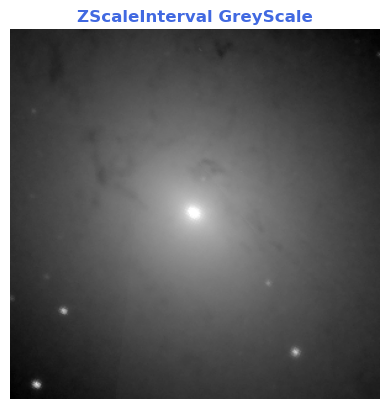

In [88]:
# visualizationn
plot_pixels(gray_array,title='ZScaleInterval GreyScale',color='royalBlue')

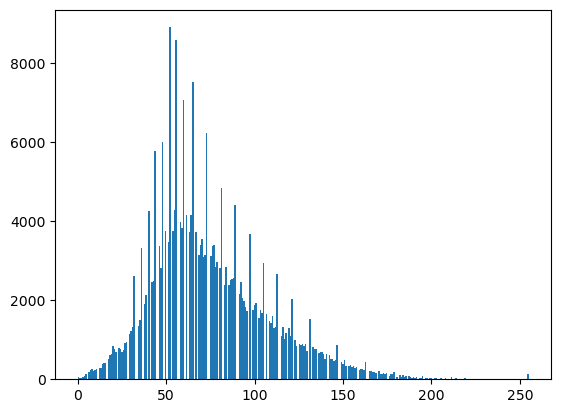

In [89]:
# Histogram Visualization

plt.hist(gray_array.flat,bins=300)
plt.show()